# Основные методы анализа данных

# Домашнее задание 2

1. Выберите не менее трех количественных признаков, объясните выбор и примените метод К-средних:

    1. для K=5

    2. для K=9

    3. В обоих случаях сделайте порядка 10 случайных инициализаций и выберите то, которое доставляет минимум критерию метода

2. Проинтерпретируйте оба разбиения с помощью признаков таблицы данных путем сравнения внутрикластерных средних с общими средними. Объясните, какое из разбиений лучше с точки зрения интерпретации. 

## Решение:

Для начала загрузим три количественных признака. Пусть это будут признаки 

- *Number_of_Vehicles*

- *Longitude*

- *Latitude*

In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [5]:
data = pandas.read_csv('../data/RoadSafetyData_Accidents_2018.csv').filter(
    items=['Number_of_Vehicles', 'Longitude', 'Latitude'])
data.head()

,Number_of_Vehicles,Longitude,Latitude
0,2,-0.139737,51.524587
1,1,0.046471,51.539651
2,2,-0.102474,51.529746
3,2,0.037828,51.530179
4,2,0.065781,51.469258


Применим метод К-средних при К=5 и К=9. Воспользуемся sklearn.cluster.

Думаю нужно упомянуть, что у класса KMeans есть параметр  n_init, который как раз и выполняет то, что нужно сделать в задании 1.С, дефолтное значение у этого параметра = 10.

Для начала просто построим график данных. И уменьшим размер выборки до 500 объектов(я до этого пробовал визуализировать все 2000 объектов, получалось не очень красиво).

In [6]:
data = data.sample(500)

In [7]:
data

,Number_of_Vehicles,Longitude,Latitude
156,2,-0.481245,51.494166
543,3,-0.253313,51.589101
113,1,-0.136228,51.508165
888,2,-0.046297,51.521809
1916,2,-0.008836,51.574236
...,...,...,...
1649,1,-0.099914,51.369453
1199,2,-0.280695,51.609467
928,1,-0.108130,51.570663
1793,2,-0.073750,51.516867


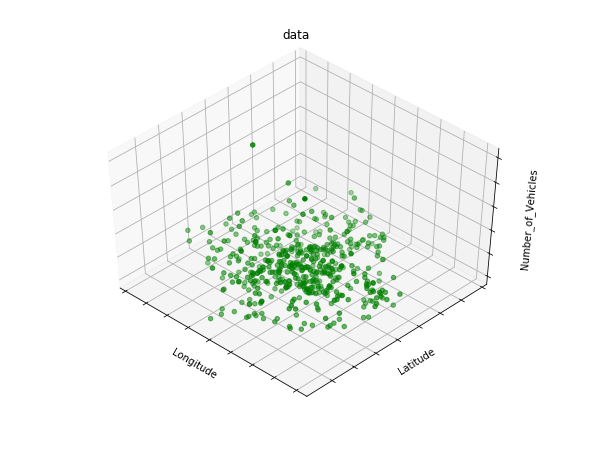

In [8]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=48, azim=134)
labels = data.columns

ax.scatter(data['Longitude'][:], data['Latitude'][:], data['Number_of_Vehicles'][:],  edgecolors='face', c='green')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number_of_Vehicles')
ax.set_title('data')
ax.dist = 12

In [9]:
model_KMeans_5 = KMeans(n_clusters=5, n_init=10)
model_KMeans_9 = KMeans(n_clusters=9, n_init=10)
model_KMeans_5.fit(data)
model_KMeans_9.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

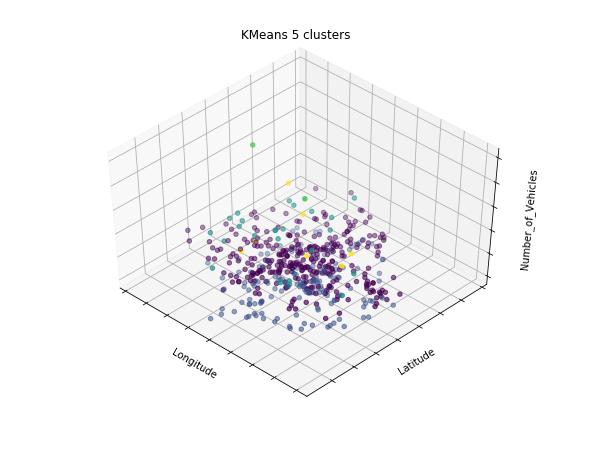

In [10]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=48, azim=134)
labels = data.columns

ax.scatter(data['Longitude'][:], data['Latitude'][:], data['Number_of_Vehicles'][:],  edgecolors='face',
            c=model_KMeans_5.labels_.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number_of_Vehicles')
ax.set_title('KMeans 5 clusters')
ax.dist = 12

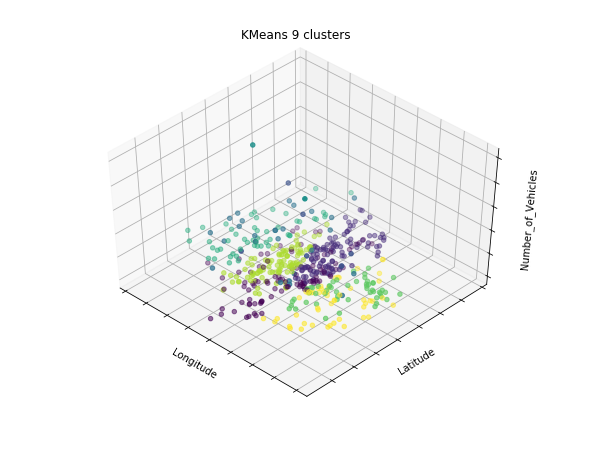

In [11]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=48, azim=134)
labels = data.columns

ax.scatter(data['Longitude'][:], data['Latitude'][:], data['Number_of_Vehicles'][:], edgecolors='face',
            c=model_KMeans_9.labels_.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number_of_Vehicles')
ax.set_title('KMeans 9 clusters')
ax.dist = 12

Теперь попробуем проинтерприторовать результаты.

In [12]:
print(model_KMeans_9.cluster_centers_)
print(model_KMeans_5.cluster_centers_)

[[ 1.         -0.06893497 51.51383926]
 [ 2.         -0.17247107 51.45763212]
 [ 4.         -0.213416   51.56074029]
 [ 3.         -0.08610296 51.53569728]
 [ 6.         -0.10146    51.54764   ]
 [ 2.          0.08703341 51.50514337]
 [ 2.         -0.35405148 51.52301606]
 [ 2.         -0.08000423 51.54145098]
 [ 1.         -0.27032352 51.51068102]]
[[ 2.         -0.1303874  51.50495782]
 [ 1.         -0.13606449 51.51278651]
 [ 3.         -0.08610296 51.53569728]
 [ 6.         -0.10146    51.54764   ]
 [ 4.         -0.213416   51.56074029]]


In [13]:
print(data['Number_of_Vehicles'].mean())
print(data['Longitude'].mean())
print(data['Latitude'].mean())

1.782
-0.13099112
51.509889030000004


In [14]:
difference_in_percent_KMeans_9 = model_KMeans_9.cluster_centers_

In [15]:
difference_in_percent_KMeans_9

array([[ 1.        , -0.06893497, 51.51383926],
       [ 2.        , -0.17247107, 51.45763212],
       [ 4.        , -0.213416  , 51.56074029],
       [ 3.        , -0.08610296, 51.53569728],
       [ 6.        , -0.10146   , 51.54764   ],
       [ 2.        ,  0.08703341, 51.50514337],
       [ 2.        , -0.35405148, 51.52301606],
       [ 2.        , -0.08000423, 51.54145098],
       [ 1.        , -0.27032352, 51.51068102]])

In [16]:
for i in range(9):
    j = 0
    for feature in ['Number_of_Vehicles', 'Longitude', 'Latitude']:
        CMean = difference_in_percent_KMeans_9[i][j]
        GMean = data[feature].mean()
        print(i, j, CMean, GMean)
        difference_in_percent_KMeans_9[i][j] = 100 * (CMean - GMean) / GMean
        j += 1

0 0 1.0000000000000022 1.782
0 1 -0.06893497115384617 -0.13099112
0 2 51.51383925961539 51.509889030000004
1 0 2.0 1.782
1 1 -0.17247106930693068 -0.13099112
1 2 51.45763211881188 51.509889030000004
2 0 4.0 1.782
2 1 -0.213416 -0.13099112
2 2 51.56074028571429 51.509889030000004
3 0 3.0 1.782
3 1 -0.08610296 -0.13099112
3 2 51.53569728 51.509889030000004
4 0 6.0 1.782
4 1 -0.10146000000000001 -0.13099112
4 2 51.54764 51.509889030000004
5 0 2.0 1.782
5 1 0.08703341176470591 -0.13099112
5 2 51.50514337254902 51.509889030000004
6 0 2.0 1.782
6 1 -0.3540514814814814 -0.13099112
6 2 51.52301605555556 51.509889030000004
7 0 2.0 1.782
7 1 -0.08000423076923077 -0.13099112
7 2 51.541450980769234 51.509889030000004
8 0 1.0000000000000009 1.782
8 1 -0.27032351923076925 -0.13099112
8 2 51.510681019230766 51.509889030000004


In [17]:
difference_in_percent_KMeans_9

array([[-4.38832772e+01, -4.73743173e+01,  7.66887619e-03],
       [ 1.22334456e+01,  3.16662300e+01, -1.01450250e-01],
       [ 1.24466891e+02,  6.29240211e+01,  9.87213459e-02],
       [ 6.83501684e+01, -3.42680939e+01,  5.01034859e-02],
       [ 2.36700337e+02, -2.25443679e+01,  7.32887815e-02],
       [ 1.22334456e+01, -1.66442223e+02, -9.21309974e-03],
       [ 1.22334456e+01,  1.70286628e+02,  2.54844765e-02],
       [ 1.22334456e+01, -3.89239280e+01,  6.12735755e-02],
       [-4.38832772e+01,  1.06367820e+02,  1.53754793e-03]])

In [18]:
difference_in_percent_KMeans_5 = model_KMeans_5.cluster_centers_

In [19]:
difference_in_percent_KMeans_5

array([[ 2.        , -0.1303874 , 51.50495782],
       [ 1.        , -0.13606449, 51.51278651],
       [ 3.        , -0.08610296, 51.53569728],
       [ 6.        , -0.10146   , 51.54764   ],
       [ 4.        , -0.213416  , 51.56074029]])

In [20]:
for i in range(5):
    j = 0
    for feature in ['Number_of_Vehicles', 'Longitude', 'Latitude']:
        CMean = difference_in_percent_KMeans_5[i][j]
        GMean = data[feature].mean()
        print(i, j, CMean, GMean)
        difference_in_percent_KMeans_5[i][j] = 100 * (CMean - GMean) / GMean
        j += 1

0 0 2.0000000000000018 1.782
0 1 -0.13038740000000001 -0.13099112
0 2 51.50495782258064 51.509889030000004
1 0 1.0000000000000027 1.782
1 1 -0.1360644871794872 -0.13099112
1 2 51.51278651282051 51.509889030000004
2 0 3.0 1.782
2 1 -0.08610296 -0.13099112
2 2 51.53569728 51.509889030000004
3 0 6.0 1.782
3 1 -0.10146000000000001 -0.13099112
3 2 51.54764 51.509889030000004
4 0 4.0 1.782
4 1 -0.213416 -0.13099112
4 2 51.56074028571429 51.509889030000004


In [21]:
difference_in_percent_KMeans_5

array([[ 1.22334456e+01, -4.60886204e-01, -9.57332177e-03],
       [-4.38832772e+01,  3.87306191e+00,  5.62510010e-03],
       [ 6.83501684e+01, -3.42680939e+01,  5.01034859e-02],
       [ 2.36700337e+02, -2.25443679e+01,  7.32887815e-02],
       [ 1.24466891e+02,  6.29240211e+01,  9.87213459e-02]])

Как мне кажется, были выбраны не самые лучшие признаки.
Но можно однозначно сказать, что и в том и другом методе отчётливо видно разбиение аварий. Практически все они были в Лондоне.

Получилось больше похоже на анализ районов Лондона, так как именно там были они. Для такого случая больше подходит KMeans с количеством кластеров = 9.

# Домашнее задание 3

Для одного из полученных в д.з. 2 разбиений

• Найдите 95% доверительный интервал для среднего
значения какого-либо признака на всем множестве
объектов, используя бутстрэп.

• Сравните средние по какому-либо признаку в двух
кластерах, используя бутстрэп.

• Для одного из кластеров сравните среднее на всем
множестве для какого-либо признака с его средним внутри
кластера, используя бутстрэп

• Примечание: каждое применение бутстрэпа должно быть
обоими методами, с опорой и без. 

## Решение

Для начала сделаем пункты 1-3 с применением бутстрэпа с опорой, потом без

### С опорой

In [169]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [170]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

Будем использовать признак Latitude(я пробовал признак Number_of_Vehicles, там слишком маленький разброс)

In [171]:
bootstrap_data = get_bootstrap_samples(data['Latitude'].values, 1000)

In [172]:
bootstrap_data

array([[51.517597, 51.42559 , 51.517722, ..., 51.47412 , 51.494504,
        51.606789],
       [51.602683, 51.399037, 51.546049, ..., 51.41539 , 51.533807,
        51.50631 ],
       [51.453818, 51.467748, 51.518877, ..., 51.507211, 51.587098,
        51.461921],
       ...,
       [51.432322, 51.481435, 51.508723, ..., 51.569202, 51.475796,
        51.611233],
       [51.530132, 51.480688, 51.530092, ..., 51.578756, 51.464542,
        51.503347],
       [51.508309, 51.509147, 51.37268 , ..., 51.594181, 51.548072,
        51.561649]])

#### Теперь посчитаем 95% доверительный интервал для среднего значения признака Latitude

In [173]:
median_scores = map(np.median, bootstrap_data)
print('95% доверительный интервал:', stat_intervals(list(median_scores), 0.05))

95% доверительный интервал: [51.5070125 51.519208 ]


#### Теперь сравним средние по какому-либо признаку в двух кластерах, используя бутстрэп

Рассмотрим среднее в клстерах 0 и 2 для K=5. Признак - Latitude

In [176]:
cluster_0_data = data['Latitude'].values[model_KMeans_5.labels_ == 0]
cluster_2_data = data['Latitude'].values[model_KMeans_5.labels_ == 2]

In [177]:
bootstrap_data_0 = get_bootstrap_samples(cluster_0_data, 1000)
bootstrap_data_2 = get_bootstrap_samples(cluster_2_data, 1000)

In [178]:
np.median(bootstrap_data_0)

51.510674

In [179]:
np.median(bootstrap_data_2)

51.538409

Получили:
- Для нулевого кластера среднее значение = 51.510674
- для второго кластера среднее значение = 51.538409

Как видим, во 2 кластере средее значение по признаку Latitude больше. Это и верно, так как в 0 кластере были только аварии с 2 транспортными средствами, а во 2 кластере с тремя.  

А если посмотреть на карту, то это как-раз различные районы. В 0 кластере - центр, во 2 - окраина.

#### Теперь для одного из кластеров сравним среднее на всем множестве для какого-либо признака с его средним внутри кластера, используя бутстрэп

Рассмотрим среднее в кластере 2 для K=5 и на всём множестве для признака - Latitude

In [180]:
median_2_cluster = np.median(bootstrap_data_2)
print(median_2_cluster)

51.538409


In [181]:
median_all_data = np.median(bootstrap_data)
print(median_all_data)

51.514819


Воспользовались уже ранее подготовленными данными.

Получили:
- для второго кластера среднее значение = 51.538409
- на всем множестве среднее значение = 51.514819

Результат тоже вполне ожидаемый, так как большинство аварий происходит в центре - именно это и показало среднее на всем множестве.  

### Теперь применим бутсрэп для 1-3 пунктов без опоры.

##### посчитаем 95% доверительный интервал для среднего значения признака Latitude
можно взять данные, которые были получены выше

Так как теперь метод без опоры, то берем 26-ю и 975-ю компоненты

In [190]:
print('95% доверительный интервал:', stat_intervals((sorted_median_scores[25], sorted_median_scores[974]), 0.05))

95% доверительный интервал: [51.50731739 51.51890311]


#### Теперь сравним средние по какому-либо признаку в двух кластерах, используя бутстрэп

Будем делать для тех же кластеров что и в методе с опорой. Так же воспользуемся уже подготовленными данными

In [215]:
list_median_scores_0 = sorted(list(map(np.median, bootstrap_data_0)))
list_median_scores_2 = sorted(list(map(np.median, bootstrap_data_2)))

In [216]:
np.median((list_median_scores_0[25], list_median_scores_0[974]))

51.50869575

In [217]:
np.median((list_median_scores_2[25], list_median_scores_2[974]))

51.551905

Получили:
- Для нулевого кластера среднее значение = 51.50869575
- Для второго кластера среднее значение = 51.551905

#### Теперь для одного из кластеров сравним среднее на всем множестве для какого-либо признака с его средним внутри кластера, используя бутстрэп

Все так же пользуемся данными, которые были получены выше

In [219]:
np.median((list_median_scores_2[25], list_median_scores_2[974]))

51.551905

In [220]:
list_median_scores_all = sorted(list(map(np.median, bootstrap_data)))
np.median((list_median_scores_all[25], list_median_scores_all[974]))

51.51311025

Получили:
- для второго кластера среднее значение = 51.551905
- на всем множестве среднее значение = 51.51311025

Как видим, разница в двух методах совсем незначительная, но она есть.

Все результаты довольно сильно похожи на правду.